<a href="https://colab.research.google.com/github/JoseFERNAN/ML4AI/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [3]:
cd drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05/

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [ ]:
ls

1-introducing_matplotlib.ipynb  3-pandas_plotting_module.ipynb  README.md
2-plotting_with_pandas.ipynb    data/


In [1]:
import matplotlib.pyplot as plt


In [4]:
ls

1-introducing_matplotlib.ipynb  3-pandas_plotting_module.ipynb  README.md
2-plotting_with_pandas.ipynb    data/


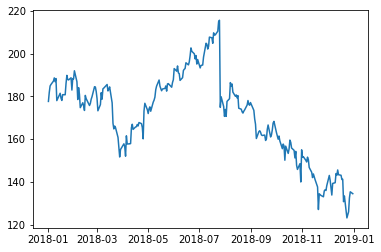

In [7]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

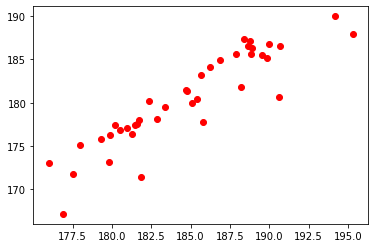

In [9]:
plt.plot('high', 'low', 'or', data=fb.head(40))

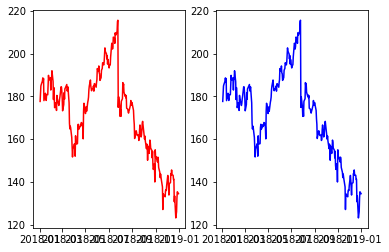

In [14]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(fb.index, fb.open, '-r')
axes[1].plot(fb.index, fb.open, '-b')

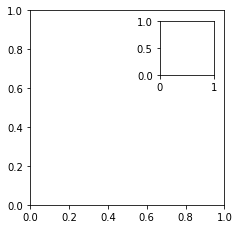

In [15]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

In [26]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [28]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.000000
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.000000
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.000000
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.000000
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,18/09/2020,18,9,2020,822,2,Denmark,DK,DNK,5806081.0,Europe,69.220529
2020-09-18,18/09/2020,18,9,2020,4326,84,Iraq,IQ,IRQ,39309789.0,Asia,153.513925
2020-09-18,18/09/2020,18,9,2020,90,0,Bahamas,BS,BHS,389486.0,America,203.088173


In [30]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

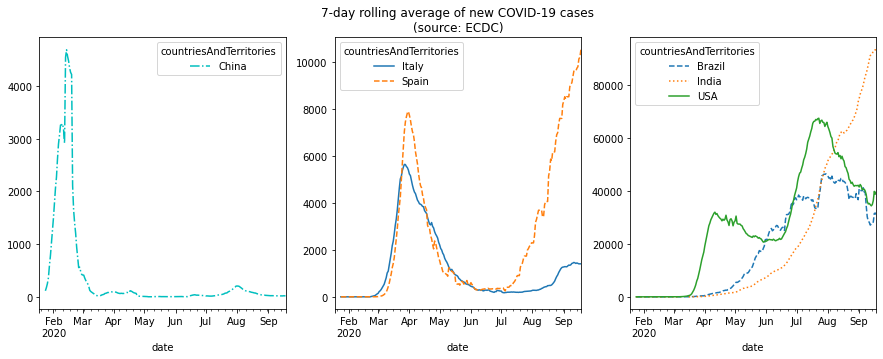

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

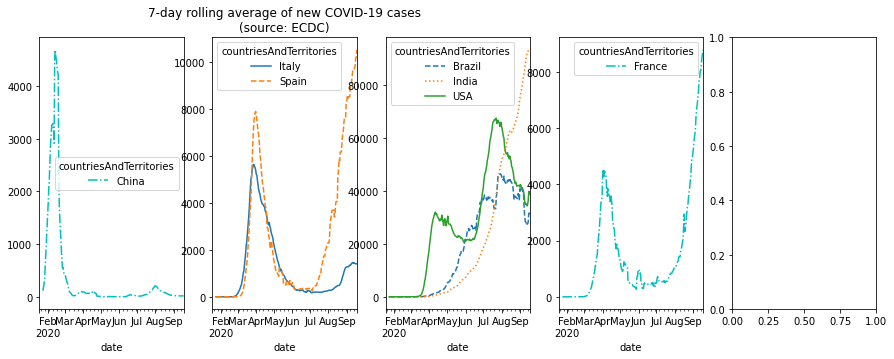

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])
new_cases_rolling_average[['France']].plot(ax=axes[3], style='-.c')


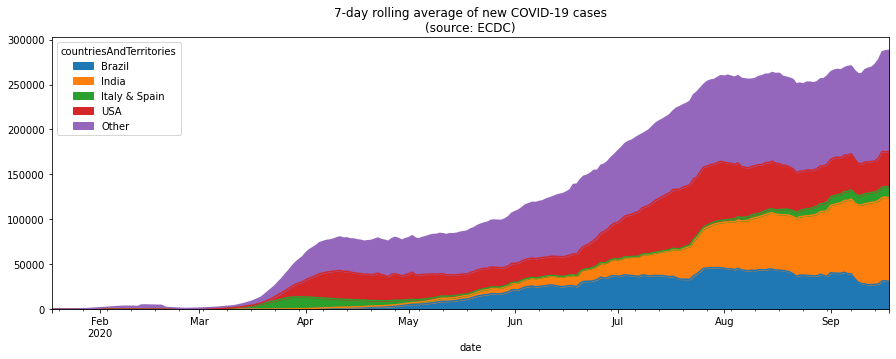

In [46]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy', 'Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols2].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

In [40]:
quakes = pd.read_csv('data/earthquakes.csv')


In [41]:
quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


Text(0, 0.5, 'count')

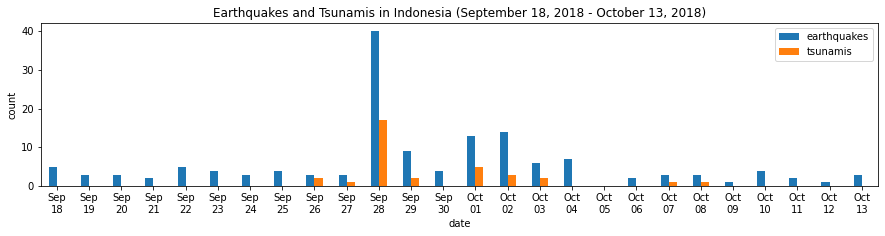

In [50]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

In [66]:
normalized = indonesia_quakes[['earthquake', 'tsunami']].apply(lambda x: x / x.sum(), axis=1)

Learning apply to get percentage

Text(0.5, 0, 'date')

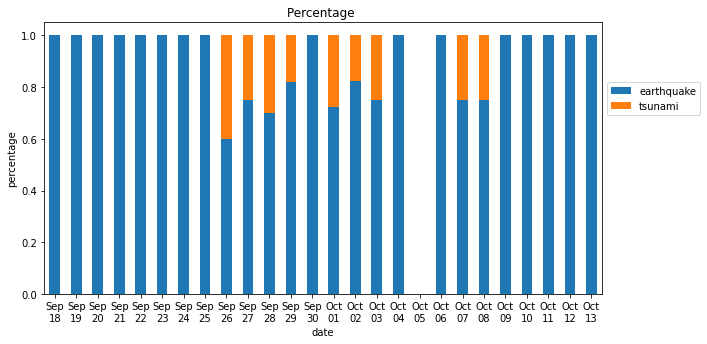

In [67]:
ax = normalized.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage '
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)
plt.xlabel('date') # label the axes (discussed in chapter 6)

Text(0, 0.5, 'count')

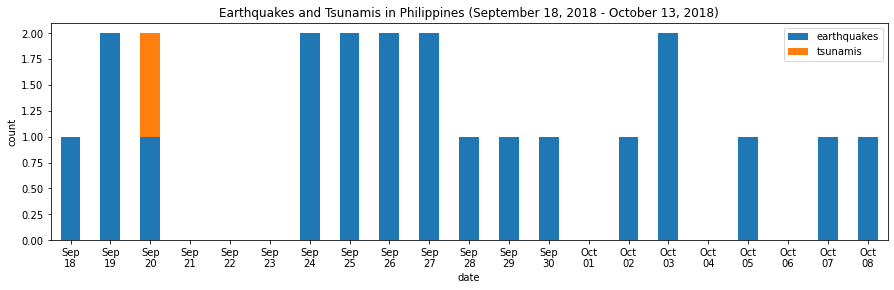

In [49]:
philippines_quakes = quakes.query('parsed_place == "Philippines"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
philippines_quakes.index = philippines_quakes.index.strftime('%b\n%d')

philippines_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 4), stacked=True, 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Philippines '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')